In [1]:
from phosphorus import *
%config InteractiveShell.ast_node_interactivity='all'


             _    _                  _    _
            | |  | |                | |  | |
           _| |_ | |__   ___  ___  _| |_ | |__   ___  _ __ _   _  ____
          /     \| '_ \ / _ \/ __|/     \| '_ \ / _ \| '__| | | |/ ___)
         ( (| |) ) | | | (_) \__ ( (| |) ) | | | (_) | |  | |_| ( (__
          \_   _/|_| |_|\___/|___/\_   _/|_| |_|\___/|_|   \__,_|\__ \
            | |                     | |                            _) )
            |_|                     |_|                           (__/

        Welcome to the Phosphorus Meaning Engine v3
        Created by Ezra Keshet (EzraKeshet.com)




In [2]:
from string import ascii_uppercase
DOMAIN = [SemVal.create(c,Type.e) for c in ascii_uppercase]
DOMAIN

def charset(f, domain = None):
  if domain is None:
    domain = DOMAIN
  return {c for c in domain if f(c)}

def iota(f, domain = None):
  return max(charset(f,domain))

'A'.e == 'A'

[A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y, Z]

True

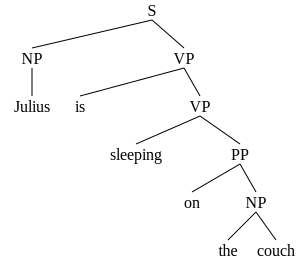


Interpreting (S (NP Julius) (VP is (VP sleeping (PP on (NP the couch)))))
      Removing vacuous items: ['is']
   Interpreting (NP Julius)
      Interpreting Julius
      => Julius = J 	(TN)
   Interpreting (VP is (VP sleeping (PP on (NP the couch))))
      Interpreting is
      => is = None 	(TN)
      Interpreting (VP sleeping (PP on (NP the couch)))
         Interpreting sleeping
         => sleeping = λx . SLEEPING(x) 	(TN)
         Interpreting (PP on (NP the couch))
            Interpreting on
            => on = λx . λy . ON(y, x) 	(TN)
            Interpreting (NP the couch)
               Interpreting the
               => the = λf . iota(f) 	(TN)
               Interpreting couch
               => couch = λx . COUCH(x) 	(TN)
               Interpreting couch
               => couch = λx . COUCH(x) 	(TN)
               Interpreting the
               => the = λf . iota(f) 	(TN)
               Interpreting couch
               => couch = λx . COUCH(x) 	(TN)
               Inte

SLEEPING(J) and ON(J, iota(lambda x: COUCH(x)))

In [ ]:
from nltk import Tree
tree = Tree.fromstring("""
(S
  (NP Julius)
  (VP is
      (VP sleeping
          (PP on (NP the couch))
      )
  )
)""")
tree

m = Meaning({
    'Julius'    : 'J'.e,
    'the'       : 'lambda f: iota(f)'.et_e,

})

m[tree]

In [4]:
the = 'lambda f: iota(f) if len(charset(f)) == 1 else None'.et_e
dog = 'lambda x: x == "A"'.et
charset(dog)
the(dog)

{A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y, Z}

A

In [5]:
f = 'lambda x : (x<y, x*2)'.et
f

Function("lambda x: x * 2 if x < y else None", Type(('e', 't')))

In [6]:
from string import ascii_uppercase as DOMAIN
DOMAIN

# Define the Predicate class
class Predicate(set):
  def __call__(self, *args):
    return int(args in self) # converts True/False to 1/0

def charset(f, domain = DOMAIN):
  return {c for c in domain if f(c)}

A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z = DOMAIN

PAWN = Predicate({
    (A,), (B,), (C,), (D,), (E,), (F,), (G,),
})



'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [7]:
#console_handler.setLevel(logging.DEBUG)
pawn = 'lambda x: PAWN(x)'.et
pawn
pawn(A)

PAWN('A'.e)


Function("lambda x: PAWN(x)", Type(('e', 't')))

1

1

In [8]:
#!pip install nltk
from nltk import Tree
#!pip install svgling

In [9]:
node = parse('PAWN("A")', mode='eval')
obj = compile(node, '<string>', 'eval')
eval(obj)

1

In [10]:
m = Meaning({
    'Joe'     : 'J'.e,
    'Kaline'  : 'K'.e,
    'cat'     : 'lambda x: CAT(x)'.et,
    'gray'    : 'lambda f : lambda x: f(x) and GRAY(x)'.et_et,
})

m['Joe', 'cat']


Interpreting ('Joe', 'cat')
   Interpreting cat
   => cat = λx . CAT(x) 	(TN)
   Interpreting Joe
   => Joe = J 	(TN)
=> ['Joe', 'cat'] = CAT(J) 	(AF)


CAT(J)

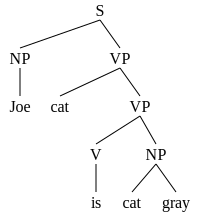


Interpreting (S (NP Joe) (VP cat (VP (V is) (NP cat gray))))
            Removing vacuous items: ['is']
            No non-vacuous children in node (V )
         Removing vacuous items: [Tree('V', [])]
   Interpreting (VP cat (VP (NP cat gray)))
      Interpreting cat
      => cat = λx . CAT(x) 	(TN)
      Interpreting (VP (NP cat gray))
         Interpreting (NP cat gray)
            Interpreting gray
            => gray = λf . λx . f(x) and GRAY(x) 	(TN)
            Interpreting cat
            => cat = λx . CAT(x) 	(TN)
         => (NP cat gray) = λx . CAT(x) and GRAY(x) 	(AF)
      => (VP (NP cat gray)) = λx . CAT(x) and GRAY(x) 	(NN)
   => (VP cat (VP (NP cat gray))) = λx . CAT(x) and (CAT(x) and GRAY(x)) 	(PM)
   Interpreting (NP Joe)
      Interpreting Joe
      => Joe = J 	(TN)
   => (NP Joe) = J 	(NN)
=> (S (NP Joe) (VP cat (VP (NP cat gray)))) = CAT(J) and (CAT(J) and GRAY(J)) 	(AF)


CAT(J) and (CAT(J) and GRAY(J))

In [11]:
t = Tree.fromstring('(S (NP Joe) (VP cat (VP (V is) (NP cat gray))))')
t

m[t]

In [12]:
m.update({
  'gray'    : 'lambda f : lambda x: f(x) and GRAY(x)'.eet_t,
  })

m['gray']
m[t]


Interpreting gray
=> gray = λf . λx . f(x) and GRAY(x) 	(TN)


Function("lambda f: lambda x: f(x) and GRAY(x)", Type(('e', (('e', 't'), 't'))))


Interpreting (S (NP Joe) (VP cat (VP (NP cat gray))))
!!! Error interpreting node (NP cat gray):
 No rule found to combine cat and gray
Previously silenced output:
   Interpreting (NP Joe)
      Interpreting Joe
      => Joe = J 	(TN)
   Interpreting (VP cat (VP (NP cat gray)))
      Interpreting cat
      => cat = λx . CAT(x) 	(TN)
      Interpreting (VP (NP cat gray))
         Interpreting (NP cat gray)
            Interpreting cat
            => cat = λx . CAT(x) 	(TN)
            Interpreting gray
            => gray = λf . λx . f(x) and GRAY(x) 	(TN)
            Interpreting gray
            => gray = λf . λx . f(x) and GRAY(x) 	(TN)
            Interpreting cat
            => cat = λx . CAT(x) 	(TN)
            Interpreting gray
            => gray = λf . λx . f(x) and GRAY(x) 	(TN)
            Interpreting cat
            => cat = λx . CAT(x) 	(TN)
            Interpreting cat
            => cat = λx . CAT(x) 	(TN)
            Interpreting gray
            => gray = λf . λx . f

ValueError: No rule found to combine cat and gray

In [ ]:
class Meaning4(Meaning):
  def rules(m, alpha):
    match alpha:      # Note: m.quiet(  ) turns off printing
      # PM
      case (beta, gamma) if m.quiet(  m[gamma].type == m[beta].type == Type.et ):
        rule = 'PM'
        value = 'lambda f : lambda g: lambda x: f(x) and g(x)'.et_et_et(m[beta])(m[gamma])

      # FA
      case (beta, gamma) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'FA'
        value = m[beta](m[gamma])
      case (gamma, beta) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'AF'
        value = m[beta](m[gamma])

      # NN
      case (beta,):
        rule = 'NN'
        value = m[beta]

      # TN
      case str():
        rule = 'TN'
        value = m.lookup(alpha)

      case _:
        rule = '??'
        value = alpha

    return value, rule

m4 = Meaning4({
    'Joe'     : 'J'.e,
    'Kaline'  : 'K'.e,
    'Texas'   : 'T'.e,
    'in'      : 'lambda x: lambda y: IN(y,x)'.eet,
    'cat'     : 'lambda x: CAT(x)'.et,
    'gray'    : 'lambda x: GRAY(x)'.et,
})

m4['gray', 'cat']
m4['Kaline', [['gray', 'cat'], ['in', 'Texas']]]

In [ ]:
class Meaning3(Meaning):
  def rules(m, alpha):
    match alpha:      # Note: m.quiet(  ) turns off printing
      # FA
      case (beta, gamma) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'FA'
        value = m[beta](m[gamma])
      case (gamma, beta) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'AF'
        value = m[beta](m[gamma])

      # NN
      case (beta,):
        rule = 'NN'
        value = m[beta]

      # TN
      case str():
        rule = 'TN'
        value = m.lookup(alpha)

      case _:
        rule = '??'
        value = alpha

    return value, rule

m3 = Meaning3({
    'Joe'     : 'J'.e,
    'Kaline'  : 'K'.e,
    'cat'     : 'lambda x: CAT(x)'.et,
    'gray'    : 'lambda f: lambda x: f(x) and GRAY(x)'.et_et,
    'fond'    : ...
})

#m3['Joe']
#m3['Kaline']
#m3['cat']
#m3['Kaline', 'cat']
m3[('a',)]
m3['a', 'cat']
m3['is', ['a', 'cat']]
m3['Kaline', [['fond', 'Joe'], ['gray', 'cat']]]
m3['Kaline', 'gray']

In [ ]:
m3.update({'is': 'lambda f: lambda x: f(lambda y:1)(x)'.et_et__et})

m3['gray']
m3['is', 'gray']

In [ ]:
tree = Tree.fromstring('(S (NP (N Kaline)) (VP is (NP (Det a) (N cat))))')
tree
m3[tree]

In [ ]:
class Meaning3(Meaning):
  def rules(m, alpha):
    match alpha:      # Note: m.quiet(  ) turns off printing
      # FA
      case (beta, gamma) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'FA'
        value = m[beta](m[gamma])
      case (gamma, beta) if m.quiet(  m[gamma] in m[beta].domain()  ):
        rule = 'AF'
        value = m[beta](m[gamma])

      # NN
      case (beta,):
        rule = 'NN'
        value = m[beta]

      # TN
      case str():# if alpha in m:
        rule = 'TN'
        value = m.lookup(alpha)

      case _:
        rule = '??'
        value = alpha
    return value, rule

m = Meaning3({
    'Ann'     : 'A'.e,
    'smokes'  : 'lambda x: SMOKES(x)'.et,
    'tall'    : 'lambda x: TALL(x)'.et,
    'likes'   : 'lambda x: lambda y: LIKES(x,y)'.eet,
#    'is'      : None,
})

m['Ann']
m['smokes']
m['Ann', 'smokes']
m['smokes', 'Ann']

In [ ]:
m['tall', 'is']

In [ ]:
t = [1,2]
t = t - [1]

In [ ]:
'lambda f:lambda x: f(x) and GRAY(x)'.et

In [ ]:
'(lambda x: lambda y: lambda z: INTRODUCED(z,x,y))(S)'.eet

a. [λx.[λy.[λz.z introduced x to y]]](Ann)(Sue)

b. [λx.[λy.[λz.z introduced x to y](Ann)](Sue)]

c. [λx.[λy.[λz.z introduced x to y](Ann)]](Sue) 

d. [λx.[λy.[λz.z introduced x to y]](Ann)](Sue)

e. [λf.[λx.f(x)=1 and x is gray]]([λy.y is a cat])

f. [λg.[λx.g(x)(Ann)=1]]([λy.[λz.z saw y]])

g. [λm.[λn.n>3 and n<7](m)] 

h. [λm.[λn.[λo.o>3 and o<7](n)](m)] 

In [ ]:
'lambda g: (lambda x:g(x)(Ann))'.eet_et('lambda y:lambda z:SAW(z,y)'.eet)

'lambda m: lambda n:n>3 and m<7'.eet('3'.e)

In [ ]:
catf = 'lambda y:CAT(y)'.et

ff = 'lambda f: lambda x: f(x) and GRAY(x)'.et_et
ff(catf)

gg = 'lambda f: f(A)'.eet_et
gg
gg('lambda x:lambda y:FOO(x,y)'.eet)

In [ ]:
Function('lambda y: CAT(y)', Type(('e', 't')))('x') and GRAY('x')

In [ ]:
import ast
ast.dump(ast.parse('x smokes', mode= 'eval'))